In [12]:
import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Task 1-1
train = pd.read_csv("./ua.base", sep="\t", names=['user','movie','rating','timestamp'])
test = pd.read_csv("./ua.test", sep="\t", names=['user','movie','rating','timestamp'])

items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [14]:
# Task 1-2
id = []
title = []
data = []
with open('./u.item', 'r', encoding='latin-1') as f:
  for line in f:
    componant = line.strip().split("|")
    data.append((int(componant[0]),componant[1])) # componant[0] =  id , componant[1] = title

print(data)

[(1, 'Toy Story (1995)'), (2, 'GoldenEye (1995)'), (3, 'Four Rooms (1995)'), (4, 'Get Shorty (1995)'), (5, 'Copycat (1995)'), (6, 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)'), (7, 'Twelve Monkeys (1995)'), (8, 'Babe (1995)'), (9, 'Dead Man Walking (1995)'), (10, 'Richard III (1995)'), (11, 'Seven (Se7en) (1995)'), (12, 'Usual Suspects, The (1995)'), (13, 'Mighty Aphrodite (1995)'), (14, 'Postino, Il (1994)'), (15, "Mr. Holland's Opus (1995)"), (16, 'French Twist (Gazon maudit) (1995)'), (17, 'From Dusk Till Dawn (1996)'), (18, 'White Balloon, The (1995)'), (19, "Antonia's Line (1995)"), (20, 'Angels and Insects (1995)'), (21, 'Muppet Treasure Island (1996)'), (22, 'Braveheart (1995)'), (23, 'Taxi Driver (1976)'), (24, 'Rumble in the Bronx (1995)'), (25, 'Birdcage, The (1996)'), (26, 'Brothers McMullen, The (1995)'), (27, 'Bad Boys (1995)'), (28, 'Apollo 13 (1995)'), (29, 'Batman Forever (1995)'), (30, 'Belle de jour (1967)'), (31, 'Crimson Tide (1995)'), (32, 'Crumb (1994)')

In [15]:
# Task 2-1 ~ 2-3
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch. randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum()/len(ratings)).item()

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001

optimizer = torch.optim.Adam([P,Q,bias_item, bias_user],lr=0.1)
X = []
Y = []
Y_test = []

for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users],dim=1) + \
                mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis,ratings)

  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q**2) + \
          lambda3 * torch.sum(bias_item** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test],dim=1) + \
                mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)


    X.append(epoch)
    Y.append(cost.item() ** 0.5)
    Y_test.append(cost_test ** 0.5)

<function matplotlib.pyplot.show>

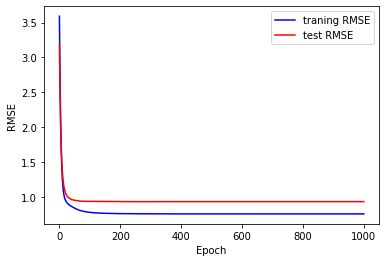

In [16]:
# Task 2-4
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.plot(X,Y,c="blue", label="traning RMSE")
plt.plot(X,Y_test,c="red",label="test RMSE")
plt.legend()
plt.show

In [17]:
# Task 3-1
predict = []

for i in range(1,len(data)):
  predict.append((i,torch.sum(P[i] * Q[13]) + mean + bias_item[i] + bias_user[13]))

predict.sort(key=lambda x:x[1],reverse=True)

print("Task 3-1 : ", end='\n')

for i in range(20):
  print(data[predict[i][0]-1][0], data[predict[i][0]-1][1])


print('\n') # 줄 나누기
# Task 3-2
cosine_similarity_list = []

for i in range(1,len(data)):
  Pzmrl = torch.sum(P[i] ** 2) ** 0.5
  Qzmrl = torch.sum(Q[13] ** 2) ** 0.5
  if (Pzmrl == 0):
    Pzmrl = 0.00000000000001
  elif (Qzmrl == 0):
    Qzmrl = 0.00000000000001

  cosine_similarity_list.append((i, torch.sum(P[i] * Q[13]) / (Pzmrl * Qzmrl))) # cosine 유사도

cosine_similarity_list.sort(key = lambda x : x[1],reverse=True)

print("Task 3-2 : ", end='\n')
for i in range(20):
  print(data[cosine_similarity_list[i][0]-1][0], data[cosine_similarity_list[i][0]-1][1])

Task 3-1 : 
50 Star Wars (1977)
181 Return of the Jedi (1983)
135 2001: A Space Odyssey (1968)
511 Lawrence of Arabia (1962)
172 Empire Strikes Back, The (1980)
257 Men in Black (1997)
187 Godfather: Part II, The (1974)
174 Raiders of the Lost Ark (1981)
100 Fargo (1996)
663 Being There (1979)
127 Godfather, The (1972)
285 Secrets & Lies (1996)
276 Leaving Las Vegas (1995)
512 Wings of Desire (1987)
430 Duck Soup (1933)
202 Groundhog Day (1993)
199 Bridge on the River Kwai, The (1957)
423 E.T. the Extra-Terrestrial (1982)
510 Magnificent Seven, The (1954)
479 Vertigo (1958)


Task 3-2 : 
814 Great Day in Harlem, A (1994)
909 Dangerous Beauty (1998)
848 Murder, My Sweet (1944)
766 Man of the Year (1995)
867 Whole Wide World, The (1996)
900 Kundun (1997)
868 Hearts and Minds (1996)
915 Primary Colors (1998)
733 Go Fish (1994)
917 Mercury Rising (1998)
791 Baby-Sitters Club, The (1995)
851 Two or Three Things I Know About Her (1966)
592 True Crime (1995)
793 Crooklyn (1994)
811 Thirty-Two

In [18]:
# Task 4-1
def cosine_similarity(p, q):
  Pzmrl = torch.sum(p ** 2) ** 0.5
  Qzmrl = torch.sum(q ** 2) ** 0.5
  if (Pzmrl == 0):
    Pzmrl = 0.00000000000001
  elif (Qzmrl == 0):
    Qzmrl = 0.00000000000001

  cosine_similarity = torch.sum(p * q) / Pzmrl / Qzmrl
  
  return cosine_similarity

def large_cosine_similarity(p, centroids):
  large_cosine_centroid_idx = -1
  large_cos = -100

  for i,c in enumerate(centroids):
    cos = cosine_similarity(p,centroids[i])
    if large_cos < cos:
      large_cosine_centroid_idx = i
      large_cos = cos

  return large_cosine_centroid_idx

def compute_centroids(assignments, points, k):
  clusters = [[] for _ in range(k)]

  for a, p in zip(assignments, points):
    if(a == 1000):
      continue
    clusters[a].append(p)

  result = []
  
  for i in range(k):
    if (clusters[i] == []):
      clusters[i] = points[random.choice(range(1,len(points)))]
    result.append(clusters[i][0])

  for i in range(k):
    for j in range(1,len(clusters[i])):
        result[i] = result[i] + clusters[i][j]

    result[i] = result[i] / len(clusters[i])

  return result

def kmeans(k, points):
  centroids = points[random.choices(range(1,len(points)), k=k)]

  for epoch in range(10):
    assignments = [1000] # 0번째값 처리

    for i in range(1,len(P)):
      assignments.append(large_cosine_similarity(points[i], centroids))

    centroids = compute_centroids(assignments, points, k)

  return assignments, centroids

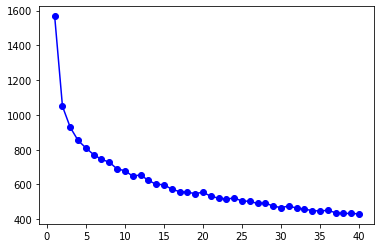

In [33]:
# Task 4-2

def cal_cost(p, assignments, centroids):
  cost = 0
  for i in range(1,len(P)):
    Pzmrl = torch.sum(P[i] ** 2) ** 0.5
    Qzmrl = torch.sum(centroids[assignments[i]] ** 2) ** 0.5
    if (Pzmrl == 0):
      Pzmrl = 0.00000001
    elif (Qzmrl == 0):
      Qzmrl = 0.00000001

    cosine_similarity = torch.sum(P[i] * centroids[assignments[i]]) / Pzmrl / Qzmrl
    cosine_distance = 1 - cosine_similarity
    cost += cosine_distance

  return cost

cost = []
for k in range(1,41):
  cost.append(cal_cost(P, *kmeans(k,P)))


plt.plot(range(1,41), cost, 'bo-')
plt.show()

# 4-3
k = 4 # 가 적당한 k값 인것 같다.

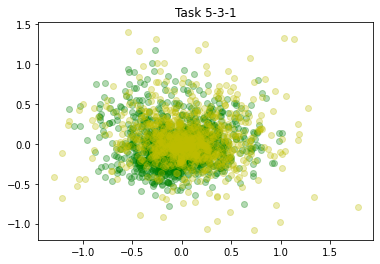

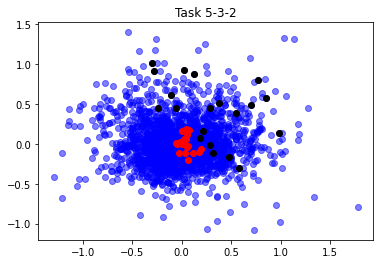

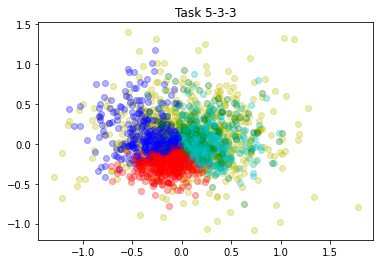

In [32]:
# Task 5-1
Z = torch.cat([P,Q]) #[M, N+N, K]

# Task 5-2
from sklearn import decomposition

pca = decomposition.PCA(2)
Z = Z.detach().numpy()
pca.fit(Z)
Zp = pca.transform(Z)

# Task 5-3-1
for i in range(1,len(Zp)):
  if i == len(P):
    continue
  if i > len(P):
    plt.scatter(*Zp[i], c = 'y', alpha=0.3)
  else:
    plt.scatter(*Zp[i], c = 'g', alpha=0.3)
  
plt.title('Task 5-3-1')
plt.show()

# Task 5-3-2
for i in range(1,len(Zp)):
  if i == len(P):
    continue
  else:
    plt.scatter(*Zp[i], c = 'b', alpha = 0.5)

for i in range(20):
  plt.scatter(*Zp[cosine_similarity_list[i][0]], c = 'r', alpha = 1)

for i in range(20):
  plt.scatter(*Zp[predict[i][0]], c = 'k', alpha = 1)

plt.title('Task 5-3-2')
plt.show()

# Task 5-3-3
color = ['r', 'b', 'g', 'c']
assignments, centroid = kmeans(4, P)
for i in range(len(P)+1,len(Zp)):
  plt.scatter(*Zp[i], c='y', alpha = 0.3)

for i in range(1,len(P)):
  plt.scatter(*Zp[i], c = color[assignments[i]], alpha = 0.3)

plt.title('Task 5-3-3')
plt.show()